# Ricardo Akira Kato Lopes - RM551447

### DATABASE: fgi-database-wb-dev-data-hub
This database provides the Financial Globalization Indices discussed in Cordella, T. and A. Ospino Rojas (2017), “Financial Globalization and Market Volatility: An Empirical Appraisal,” Wolrd Bank Working Paper 8091 , where the reader could find detailed explanations on how such indices have been constructed.

Description of variables:

* wb_code: World Bank Country Code.
* countryName: World Bank Country name.
* year: year (1992-2016)
* FGI_1: Financial Globalization Index
* UFGI_1: Unadjusted (Raw) Globalization Index

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('fgi-database-wb-dev-data-hub_0.csv', encoding='latin1')

In [7]:
df

,wb_code,year,FGI_1,UFGI_1,countryName
0,ARE,1992,NaN,NaN,United Arab Emirates
1,ARE,1993,NaN,NaN,United Arab Emirates
2,ARE,1994,NaN,NaN,United Arab Emirates
3,ARE,1995,NaN,NaN,United Arab Emirates
4,ARE,1996,NaN,NaN,United Arab Emirates
...,...,...,...,...,...
2095,ZMB,2012,0.014403,0.015616,Zambia
2096,ZMB,2013,0.002768,0.001632,Zambia
2097,ZMB,2014,0.020499,0.008014,Zambia
2098,ZMB,2015,0.070848,0.054242,Zambia


In [55]:
df.describe()

,year,FGI_1,UFGI_1
count,2100.00000,1.760000e+03,1.760000e+03
mean,2004.00000,2.896045e-01,2.596332e-01
std,7.21282,2.722714e-01,2.594102e-01
min,1992.00000,5.170000e-09,2.270000e-09
25%,1998.00000,3.628962e-02,2.668975e-02
50%,2004.00000,2.109508e-01,1.715547e-01
75%,2010.00000,4.931483e-01,4.357684e-01
max,2016.00000,9.406633e-01,9.287139e-01


In [57]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
wb_code          0
year             0
FGI_1          340
UFGI_1         340
countryName      0
dtype: int64


In [69]:
unique_countries = df['countryName'].unique()
print("\nUnique countries in the dataset:")
unique_countries = sorted(unique_countries)
print(unique_countries)


Unique countries in the dataset:
['Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Hong Kong Special Administrative Region of China', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'The former Yugoslav Republic of Macedonia',

In [71]:
summary_statistics = df[['FGI_1', 'UFGI_1']].describe()
print("\nSummary statistics for FGI_1 and UFGI_1:")
print(summary_statistics)


Summary statistics for FGI_1 and UFGI_1:
              FGI_1        UFGI_1
count  1.760000e+03  1.760000e+03
mean   2.896045e-01  2.596332e-01
std    2.722714e-01  2.594102e-01
min    5.170000e-09  2.270000e-09
25%    3.628962e-02  2.668975e-02
50%    2.109508e-01  1.715547e-01
75%    4.931483e-01  4.357684e-01
max    9.406633e-01  9.287139e-01


In [73]:
country_means = df.groupby('countryName')[['FGI_1', 'UFGI_1']].mean()
print("\nMean values for FGI_1 and UFGI_1 by country:")
print(country_means)


Mean values for FGI_1 and UFGI_1 by country:
                                                       FGI_1    UFGI_1
countryName                                                           
Argentina                                           0.241475  0.205680
Australia                                           0.460657  0.387822
Austria                                             0.575564  0.495990
Bahrain                                             0.007990  0.004817
Bangladesh                                          0.005302  0.004641
...                                                      ...       ...
United Arab Emirates                                0.100310  0.105192
United Kingdom of Great Britain and Northern Ir...  0.763494  0.687989
United States of America                            0.317540  0.270371
Vietnam                                             0.021091  0.020959
Zambia                                              0.015006  0.016676

[84 rows x 2 columns]


<Figure size 2000x800 with 0 Axes>

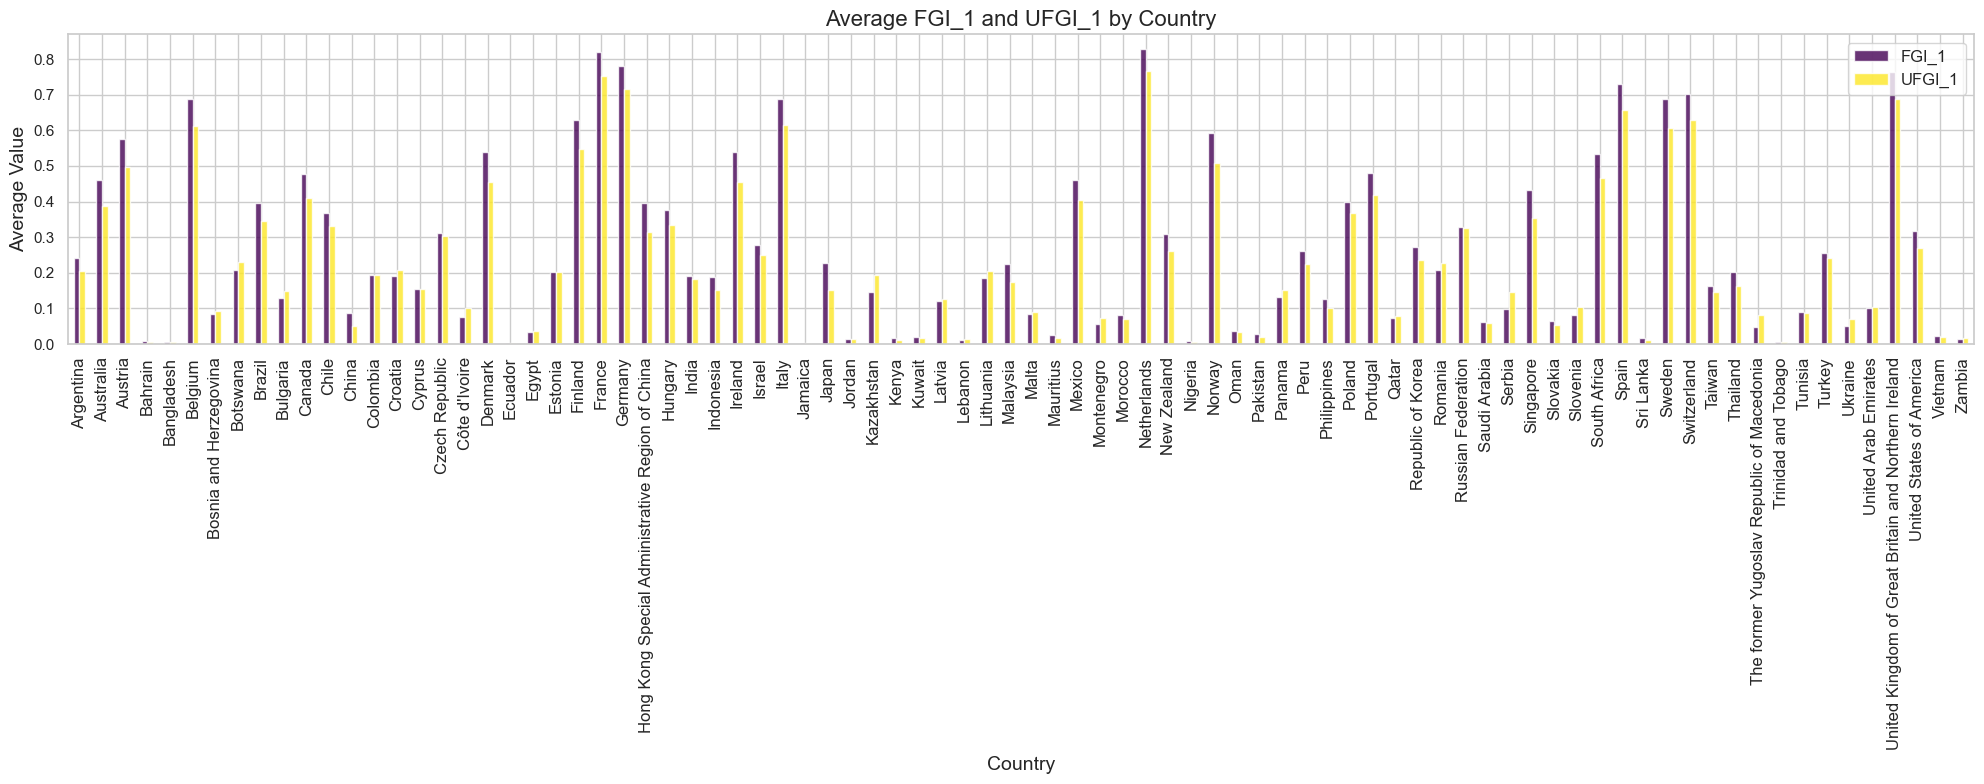

In [47]:


mean_values = df.groupby('countryName')[['FGI_1', 'UFGI_1']].mean()


plt.figure(figsize=(20, 8))  # Adjust the figure size to make it more readable
mean_values.plot(kind='bar', figsize=(20, 8), colormap='viridis', alpha=0.8)
plt.title('Average FGI_1 and UFGI_1 by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=12)  # Rotate x-axis labels to 90 degrees and center-align them
plt.tight_layout()  # Ensure everything fits without overlapping
plt.legend(loc='upper right', fontsize=12)
plt.show()

# Bars plot

With this plot we can see the average FGI1 and UFGI1 by country, wwith this we can see clearly which countries had the highest Financial Globalization Index throughout the years.

What country do you want to see the FGI_1 and UFGI_1 Trend Over Years


None Argentina


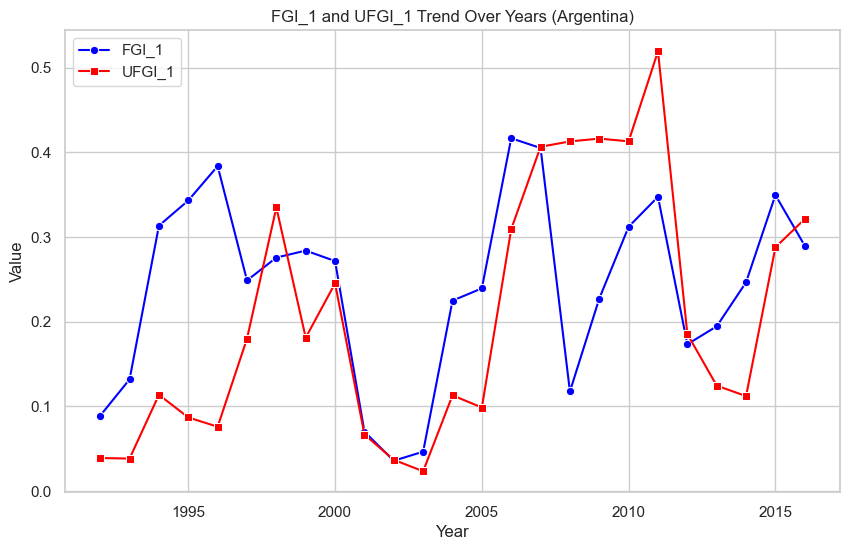

In [56]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

name = input(print("What country do you want to see the FGI_1 and UFGI_1 Trend Over Years"))
country_data = df[df['countryName'] == name]

plt.figure(figsize=(10, 6))
sns.lineplot(data=country_data, x='year', y='FGI_1', marker='o', color='blue', label='FGI_1')
sns.lineplot(data=country_data, x='year', y='UFGI_1', marker='s', color='red', label='UFGI_1')
plt.title(f'FGI_1 and UFGI_1 Trend Over Years ({name})')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Line plot

This line plot asks you what country do you want to see both the FGI1 and UFGI1 Trend over the years, you can see how these values have changed over the years, and also the great difference that the unadjusted financial global index have over the adjusted

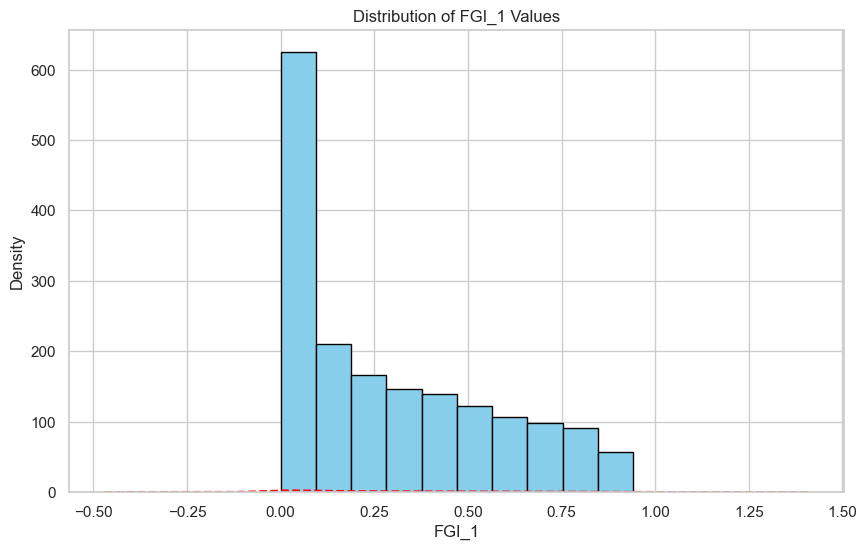

In [45]:
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10, 6))
plt.hist(df['FGI_1'].dropna(), bins=10, color='skyblue', edgecolor='black')  # Drop NaNs for histogram
plt.title('Distribution of FGI_1 Values')
plt.xlabel('FGI_1')
plt.ylabel('Frequency')


df['FGI_1'].dropna().plot(kind='kde', color='red', linestyle='--')

plt.show()

# Histogram Plot

This histogram plot shows the distribution of FGI_1 values, with bars representing the frequency of values within 10 bins. The red dashed line is a Kernel Density Estimate (KDE), providing a smoothed continuous curve of the probability density. This visualization highlights the spread and density of FGI_1 values, revealing the most common value ranges and overall distribution pattern.

What country do you want to see the proportion between FGI_1 and UFGI_1?


None Argentina


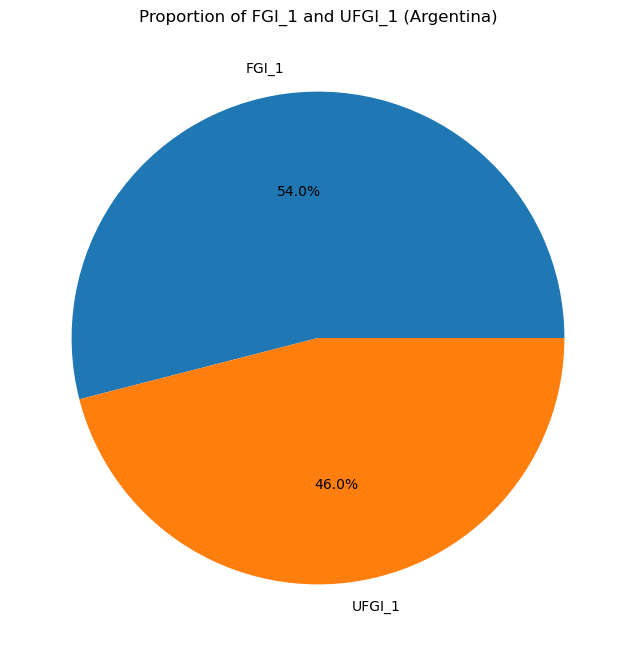

In [103]:
name = input(print("What country do you want to see the proportion between FGI_1 and UFGI_1?"))
country_data = df[df['countryName'] == name]
numerical_data = country_data[['FGI_1', 'UFGI_1']]
numerical_data.sum().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title(f'Proportion of FGI_1 and UFGI_1 ({name})')
plt.ylabel('')
plt.show()

# Pizza Plot

This pie plot shows the proportion of FGI_1 and UFGI_1 values for a selected country, with each slice representing the sum of these values. The percentage on each slice indicates its contribution to the total. This visualization highlights the relative size of FGI_1 compared to UFGI_1 for the chosen country.

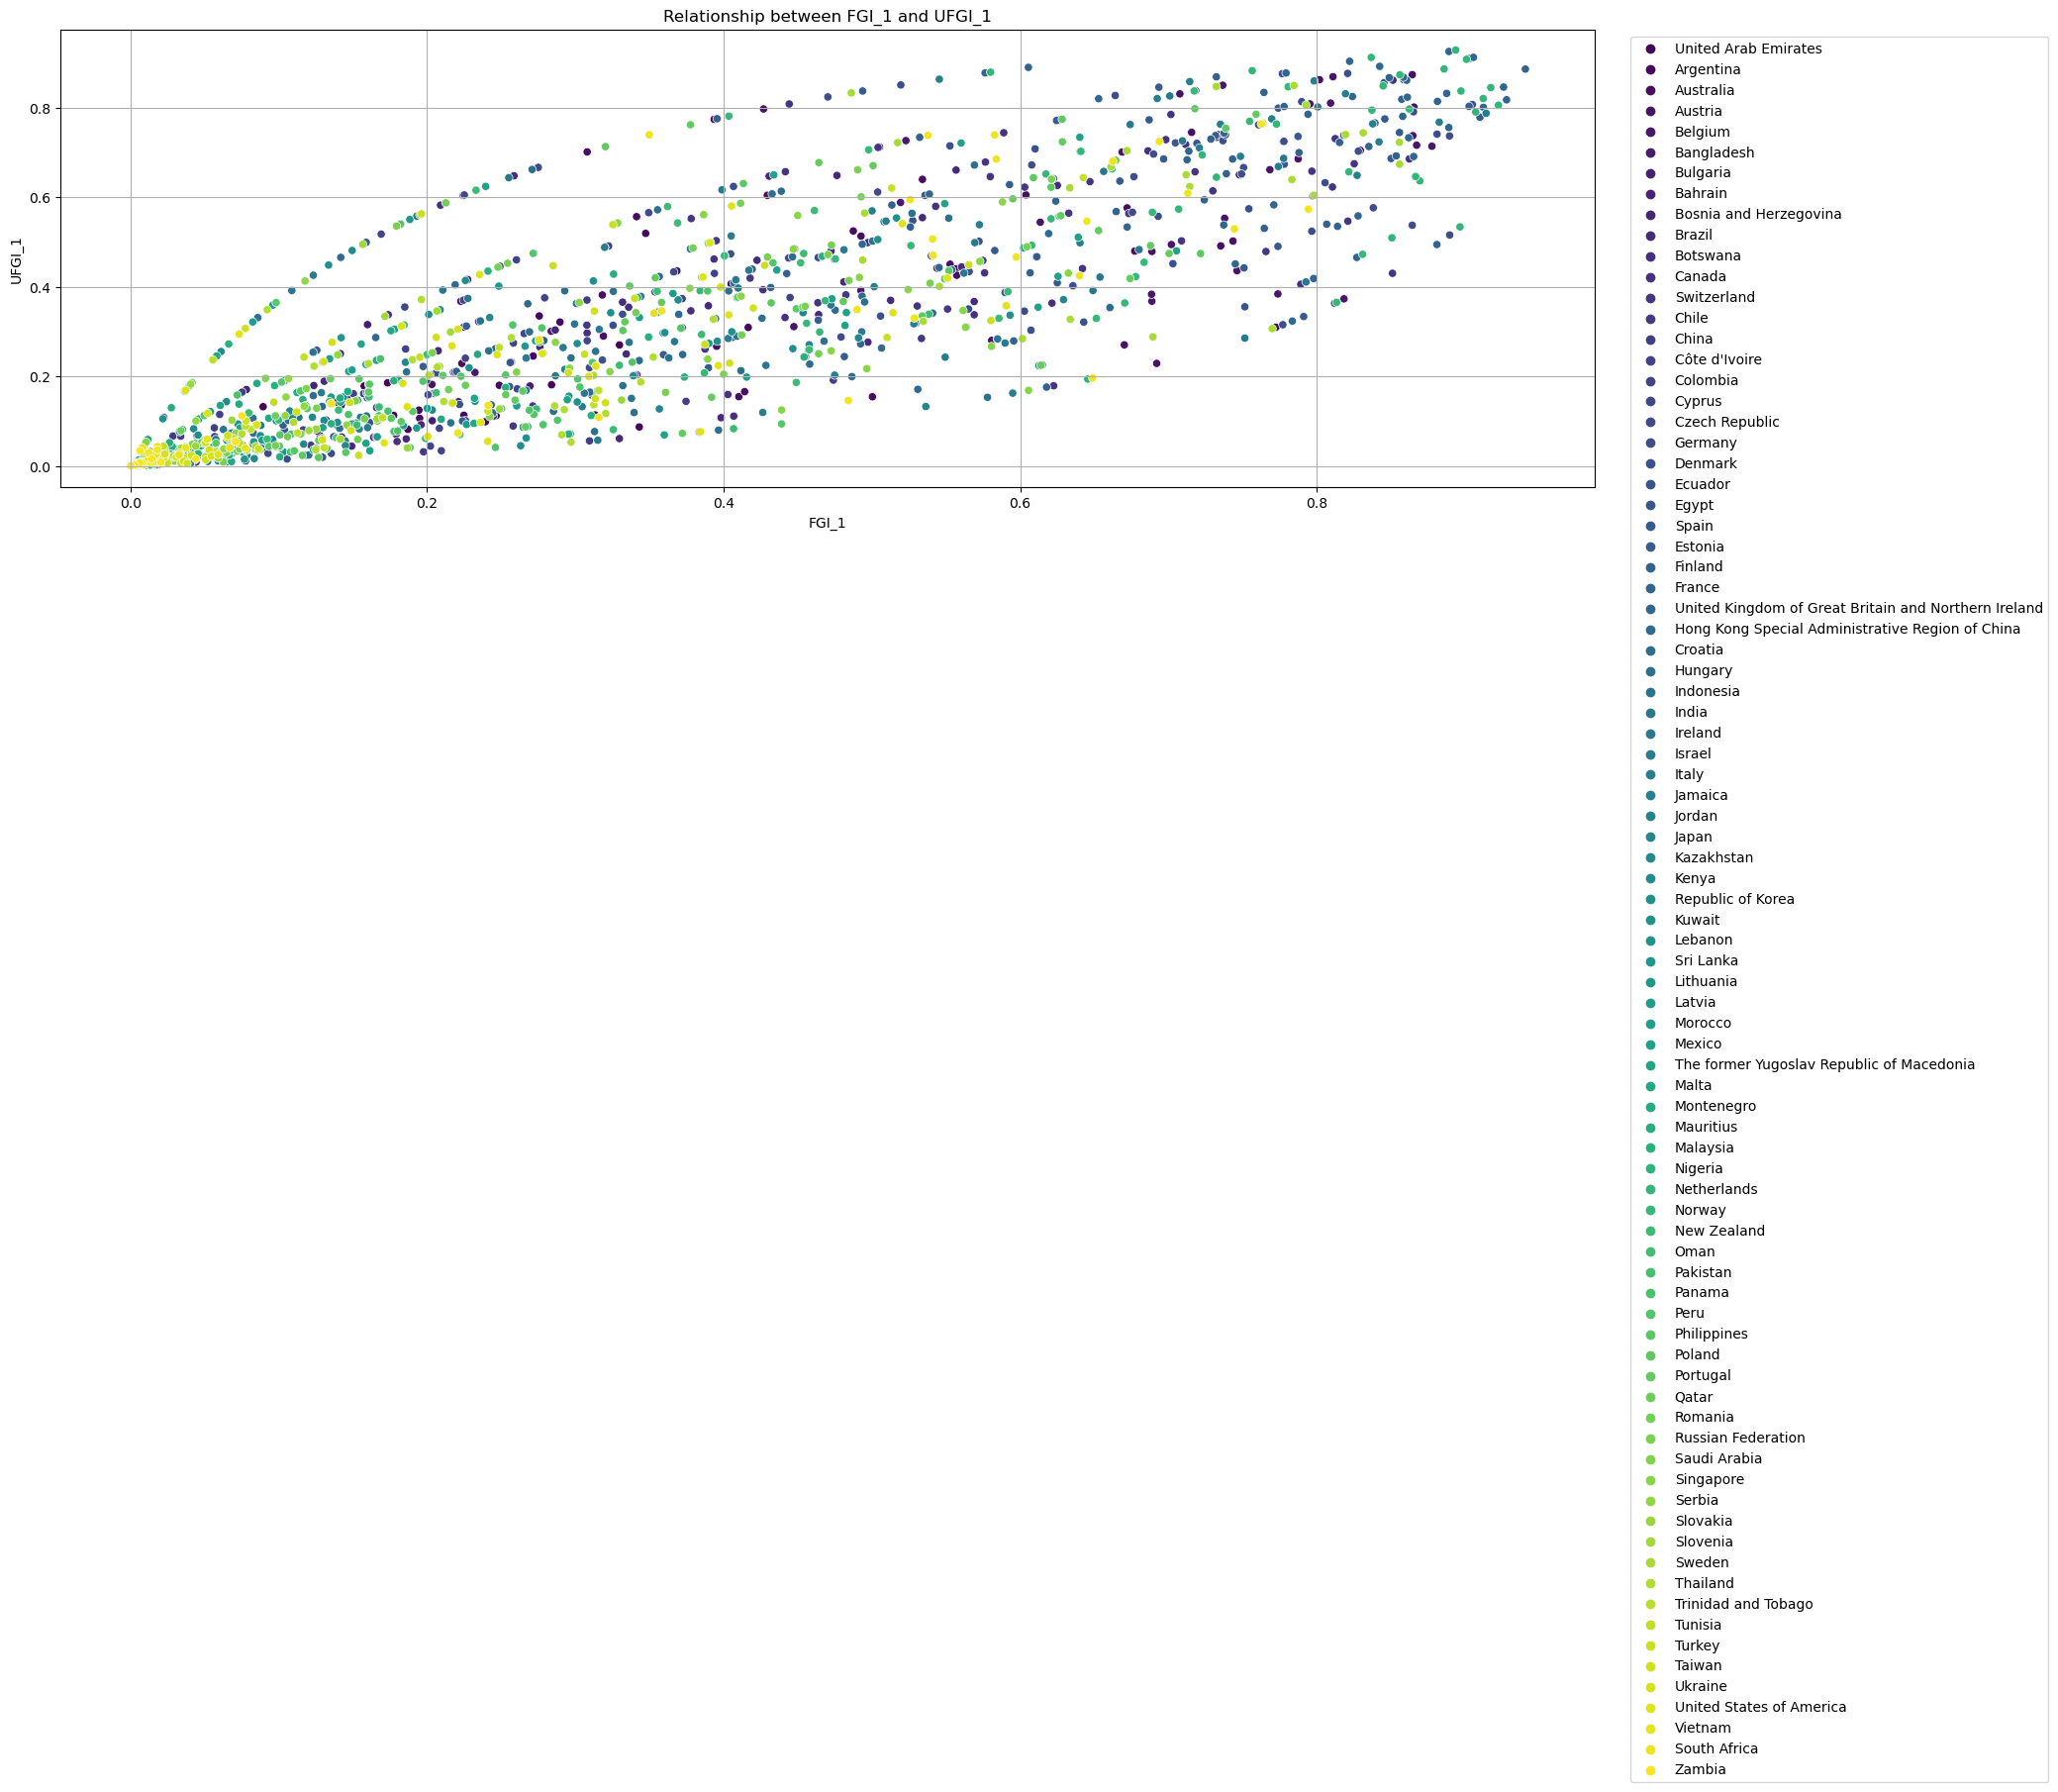

In [167]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='FGI_1', y='UFGI_1', hue='countryName', palette='viridis', legend='full')
plt.title('Relationship between FGI_1 and UFGI_1')
plt.xlabel('FGI_1')
plt.ylabel('UFGI_1')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

# Scatter Plot

This scatter plot illustrates the relationship between FGI_1 and UFGI_1 across multiple countries, with each point representing a country. The color of each point corresponds to the country, allowing for easy identification. This visualization enables the observation of patterns and correlations between the two indices across different countries.